In [38]:
# import necessary packages
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import neuropythy as ny
from itertools import product
from visualization import plot_annot_properties as vis
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
roi_list = ['V1','V2','V3','hV4','VO1','VO2', 'VO', 'cortex']

In [40]:

v4vo12_file = '../derivatives/surface_areas_2022-02-27.csv'
v4vo12_df = pd.read_csv(v4vo12_file)
v4vo12_df['VO'] = v4vo12_df[['VO1','VO2']].sum(axis=1)
v4vo12_df = v4vo12_df.drop(columns=['message'])
v4vo12_df.head(5)

,hV4,VO2,VO1,cortex,rater,sid,hemisphere,VO
0,781.737434,303.489328,100.468879,107230.953125,BrendaQiu,100610,lh,403.958207
1,653.491056,359.608152,113.126526,108015.562500,BrendaQiu,100610,rh,472.734679
2,584.953536,333.010054,183.841560,99291.320312,BrendaQiu,102311,lh,516.851614
3,808.426349,276.758045,427.680084,100608.046875,BrendaQiu,102311,rh,704.438129
4,961.528820,215.701942,392.237191,91761.718750,BrendaQiu,102816,lh,607.939133


In [41]:
long_mean_v4vo12_df = v4vo12_df.query('rater == "mean"')
long_mean_v4vo12_df = long_mean_v4vo12_df.rename(columns = {'rater': 'anatomist'})

In [42]:
v123_df = ny.data['hcp_lines'].surface_area_dataframe
v_area_cols = [f'roi{hemi}{varea}' for hemi, varea in product(['L','R'], ['V1','V2','V3'])]
mean_v123_df = v123_df.query('anatomist == "mean"')
mean_v123_df = mean_v123_df.drop(columns=[col for col in mean_v123_df if col not in ['sid','anatomist']+v_area_cols])
mean_v123_df

,sid,anatomist,roiLV1,roiLV3,roiLV2,roiRV1,roiRV3,roiRV2
4,100610,mean,2182.648869,1119.816370,1728.088569,1860.693153,1172.995850,1659.008599
9,118225,mean,1979.312683,1064.189967,1669.270603,2051.494042,1352.400127,1849.540834
14,140117,mean,1153.694862,872.083832,1118.138452,1116.527387,865.760388,1207.856324
19,158136,mean,1231.193647,1001.229745,1271.163609,1205.712993,1008.570664,1355.516790
24,172130,mean,1022.975665,886.230702,1164.040613,1022.367207,782.037635,1111.529883
...,...,...,...,...,...,...,...,...
884,406836,mean,1444.961363,1114.681135,1335.570071,1273.361188,1045.837380,1290.200584
889,572045,mean,1136.901352,875.898848,1026.256552,974.767644,904.958032,870.247724
894,706040,mean,NaN,NaN,NaN,808.052458,691.081453,773.187416
899,818859,mean,1338.753442,1060.750740,1248.840014,1381.183600,944.633979,1237.964415


In [43]:
long_mean_v123_df = vis.melt_roi_list_to_lh_rh(mean_v123_df, ['V1','V2','V3'], id_vars=['sid','anatomist'])
long_mean_v123_df

,sid,anatomist,hemisphere,V1,V2,V3
0,100610,mean,lh,2182.648869,1728.088569,1119.816370
1,118225,mean,lh,1979.312683,1669.270603,1064.189967
2,140117,mean,lh,1153.694862,1118.138452,872.083832
3,158136,mean,lh,1231.193647,1271.163609,1001.229745
4,172130,mean,lh,1022.975665,1164.040613,886.230702
...,...,...,...,...,...,...
357,406836,mean,rh,1273.361188,1290.200584,1045.837380
358,572045,mean,rh,974.767644,870.247724,904.958032
359,706040,mean,rh,808.052458,773.187416,691.081453
360,818859,mean,rh,1381.183600,1237.964415,944.633979


In [44]:
mean_varea_df = pd.merge(long_mean_v123_df, long_mean_v4vo12_df, on=['sid','hemisphere','anatomist'])

In [45]:
col_list = mean_varea_df.drop(columns=roi_list).columns.to_list()
mean_varea_df = mean_varea_df[col_list + roi_list] # reorder

# Surface area correlations between different ROIs

<AxesSubplot:>

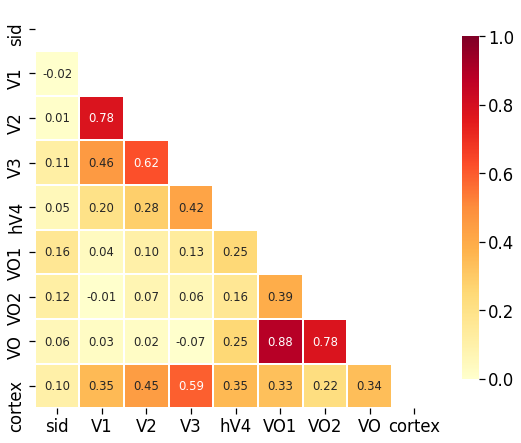

In [46]:
corr_matrix, mask = vis.get_correlation_matrix(mean_varea_df)
vis.heatmap_surface_area(corr_matrix, mask=mask, height=9, annot=True)

In [47]:
hemi_mean_varea_df = vis.unmelt_lh_rh_rois(mean_varea_df, roi_list)

In [48]:
hemi_corr_matrix = hemi_mean_varea_df.corr()
hemi_mask = np.triu(hemi_corr_matrix)

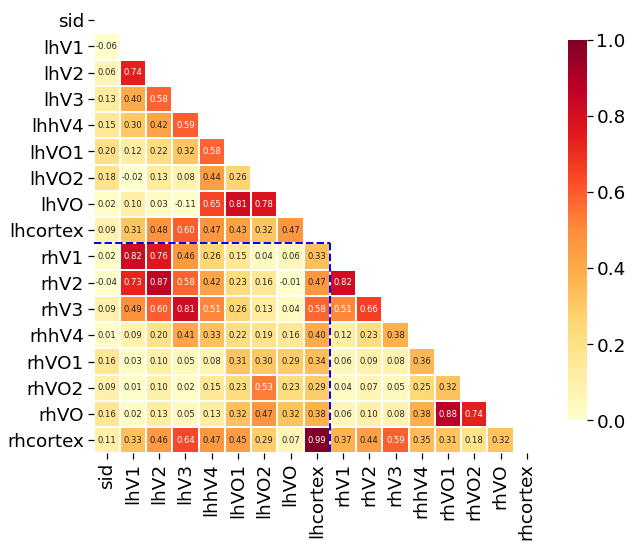

In [93]:
grid = vis.heatmap_surface_area(hemi_corr_matrix, mask=hemi_mask, height=10, boundary_line=len(roi_list)+1)

In [84]:
len(hemi_mean_varea_df.columns)

18

# Surface area comparison between different ROIs

In [50]:
long_surface_df = pd.melt(v4vo12_df, id_vars=['rater','sid','hemisphere','cortex'], value_vars=['hV4','VO2','VO1', 'VO'], var_name='roi', value_name='surface_area')
long_surface_df = long_surface_df.dropna()
long_surface_df = long_surface_df.query('rater != "mean"')

In [51]:
long_surface_df.head()

,rater,sid,hemisphere,cortex,roi,surface_area
0,BrendaQiu,100610,lh,107230.953125,hV4,781.737434
1,BrendaQiu,100610,rh,108015.562500,hV4,653.491056
2,BrendaQiu,102311,lh,99291.320312,hV4,584.953536
3,BrendaQiu,102311,rh,100608.046875,hV4,808.426349
4,BrendaQiu,102816,lh,91761.718750,hV4,961.528820


<Figure size 792x792 with 0 Axes>

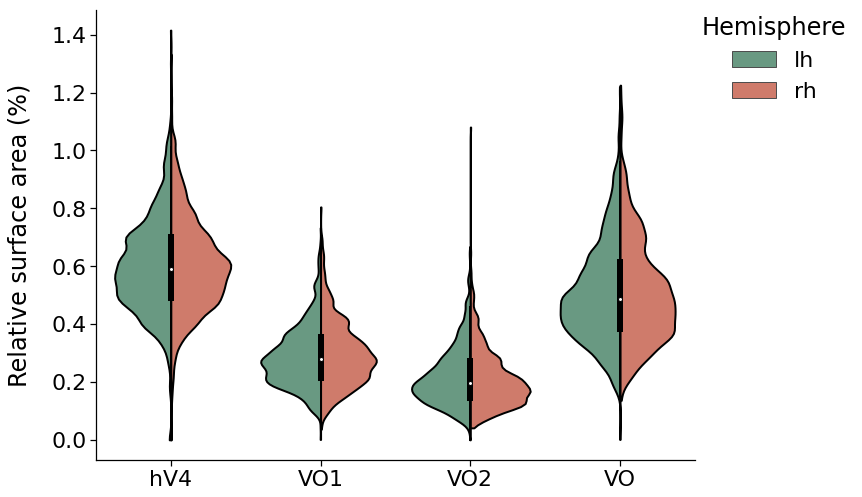

In [52]:
my_cmap = sns.diverging_palette(150, 20, s=50, l=60, sep=1, n=2, as_cmap=False)
grid = vis.violinplot_surface_area(long_surface_df, 'roi', x_order=['hV4','VO1','VO2', 'VO'], cmap=my_cmap, relative_area=True);

<Figure size 792x792 with 0 Axes>

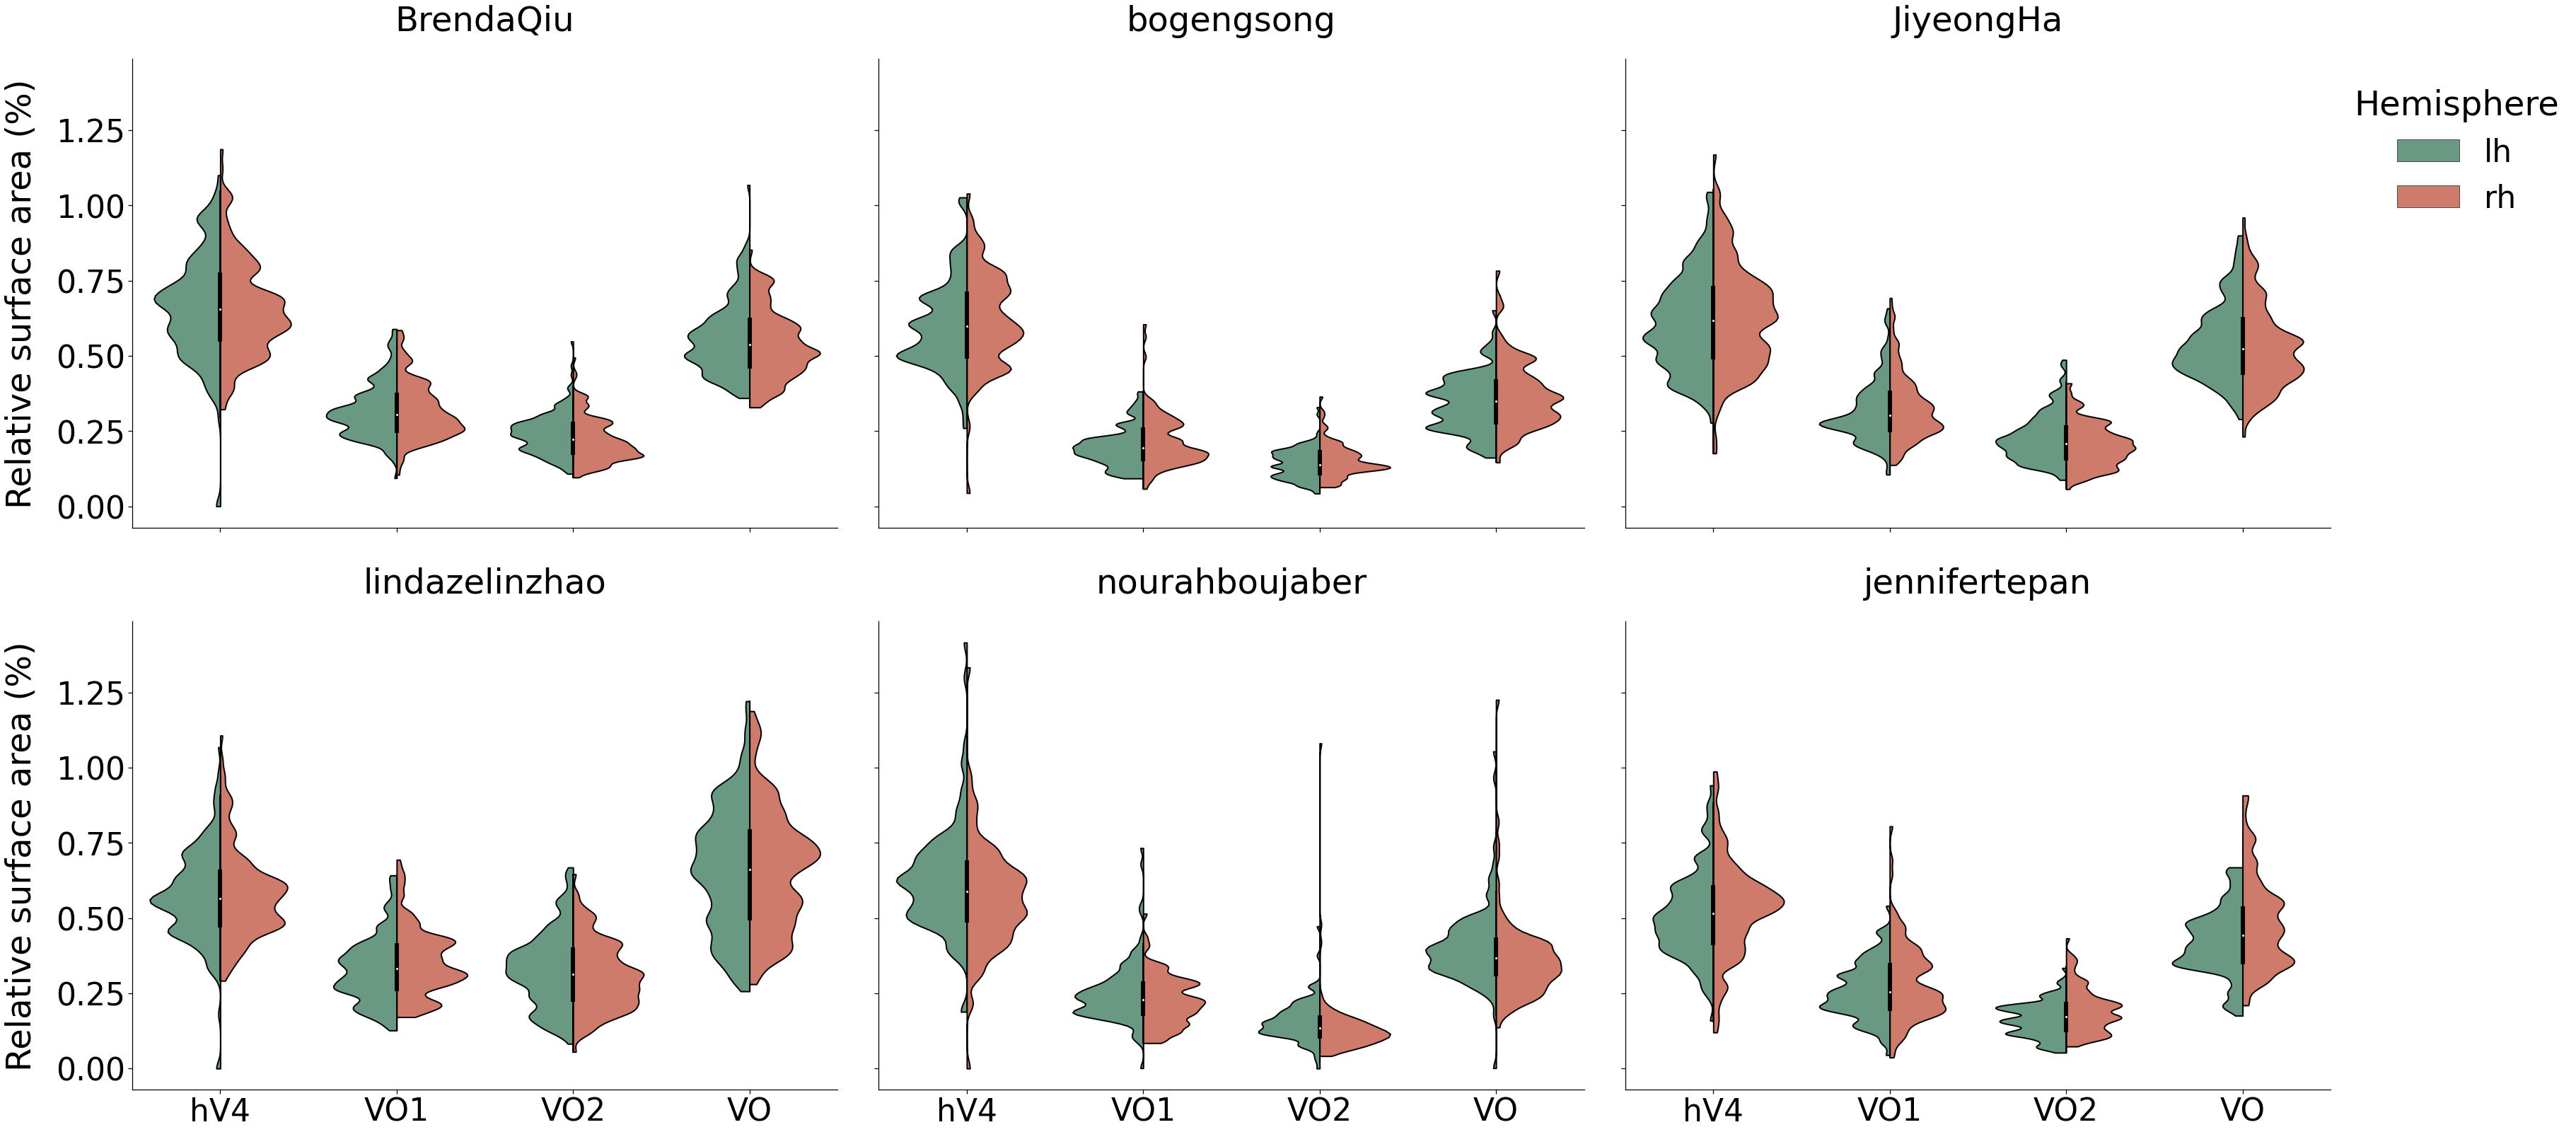

In [56]:
grid = vis.violinplot_surface_area(long_surface_df,
                                   x='roi',
                                   x_order=['hV4','VO1','VO2', 'VO'],
                                   hue='hemisphere',
                                   split=True,
                                   col='rater',
                                   col_wrap=3,
                                   height=12,
                                   cmap=my_cmap,
                                   relative_area=True)